In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("./data/iris_1D.csv", delimiter=",", skip_header=1)

X = iris[:, :1]
y = iris[:, 1]
N = 6

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

print(X.shape)
print(y.shape)

(6, 2)
(6,)


In [2]:
X

array([[1. , 1.4],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 3. ],
       [1. , 3.8],
       [1. , 4.1]])

In [3]:
y

array([0., 0., 0., 1., 1., 1.])

In [10]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))


def predict(x, theta):
    y_hat = sigmoid_function(np.dot(x, theta))
    return y_hat


def loss_function(y_hat, y):
    return (y_hat - y) ** 2


def compute_gradient(x, y_hat, y):
    return 2 * x * (y_hat - y) * y_hat * (1 - y_hat)

In [11]:
lr = 0.31
num_iter = 4000

theta = np.array([0.1, 5])
losses = []
accs = []

for _ in range(num_iter):
    for i in range(N):
        xi = X[i]
        yi = y[i]

        # predict
        y_hat = predict(xi, theta)

        # loss
        loss = loss_function(y_hat, yi)

        # gradient and update
        gradient = compute_gradient(xi, y_hat, yi)
        theta -= lr*gradient

        losses.append(loss)

    preds = predict(X, theta).round()
    acc = (preds == y).mean()
    accs.append(acc)

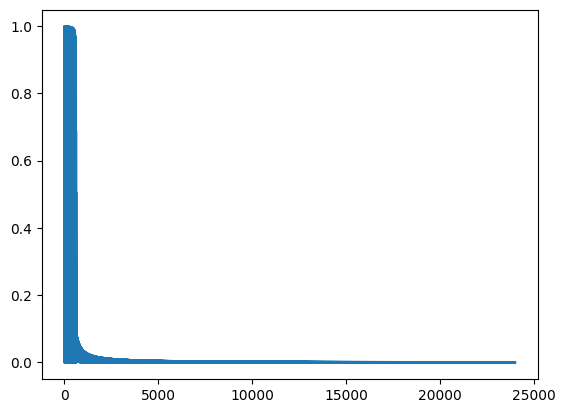

In [12]:
plt.plot(losses)
plt.show()

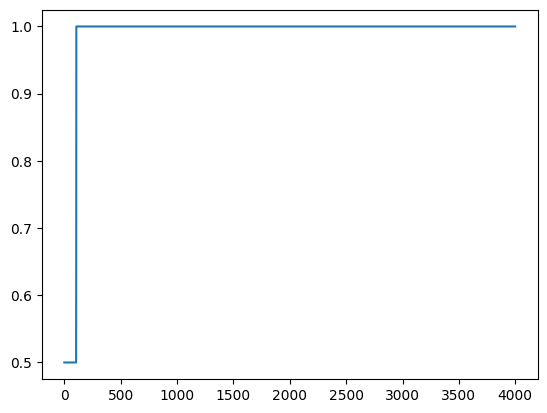

In [13]:
plt.plot(accs)
plt.show()

In [14]:
preds = predict(X, theta).round()
print(preds)
print(y)

[0. 0. 0. 1. 1. 1.]
[0. 0. 0. 1. 1. 1.]
